# Predicting the Survival of a Patient, 1 Year after Myocardial Infarction

## Importing the required Modules

In [81]:
import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

sns.set_style('darkgrid')
cmap = sns.cm.mako_r


## Importing the Data

In [82]:
ds = pd.read_csv("./data/echocardiogram.data", error_bad_lines=False)
ds

b'Skipping line 50: expected 13 fields, saw 14\n'


,11,0,71,0.1,0.260,9,4.600,14,1,1.1,name,1.2,0.2
0,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
1,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
2,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
3,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
4,26,0,68,0,0.260,5,4.310,12,1,0.857,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?
126,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?
127,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?
128,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?


In [83]:
df = pd.DataFrame(ds)

df.columns = ['survival', 'still-alive', 'age-at-heart-attack', 'pericardial-effusion', 'fractional-shortening', 'epss', 'lvdd', 'wall-motion-score', 'wall-motion-index', 'mult', 'name','group',  'alive-at-1']
df.to_csv('./data/compiled.csv', index=False)

In [84]:
df = pd.read_csv("./data/compiled.csv")
df

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
0,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
1,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
2,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
3,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
4,26,0,68,0,0.260,5,4.310,12,1,0.857,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?
126,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?
127,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?
128,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?


## Data Preprocessing

### Removing unnecessary columns

In [85]:
df.drop(["wall-motion-score", "mult", "name", "group"],axis=1, inplace=True)
df

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,alive-at-1
0,19,0,72,0,0.380,6,4.100,1.700,0
1,16,0,55,0,0.260,4,3.420,1,0
2,57,0,60,0,0.253,12.062,4.603,1.450,0
3,19,1,57,0,0.160,22,5.750,2.250,0
4,26,0,68,0,0.260,5,4.310,1,0
...,...,...,...,...,...,...,...,...,...
125,7.5,1,64,0,0.24,12.9,4.72,1,?
126,41,0,64,0,0.28,5.40,5.47,1.10,?
127,36,0,69,0,0.20,7.00,5.05,1.21,?
128,22,0,57,0,0.14,16.1,4.36,1.36,?


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   survival               130 non-null    object
 1   still-alive            130 non-null    int64 
 2   age-at-heart-attack    130 non-null    object
 3   pericardial-effusion   130 non-null    int64 
 4   fractional-shortening  130 non-null    object
 5   epss                   130 non-null    object
 6   lvdd                   130 non-null    object
 7   wall-motion-index      130 non-null    object
 8   alive-at-1             130 non-null    object
dtypes: int64(2), object(7)
memory usage: 9.3+ KB


For some of the data, whether they were alive at 1 year since the incident, is unknown and marked with a "?". This has been removed.

In [87]:
names = df[ df['alive-at-1'] == '?'].index
df.drop(names, inplace=True)
df

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,alive-at-1
0,19,0,72,0,0.380,6,4.100,1.700,0
1,16,0,55,0,0.260,4,3.420,1,0
2,57,0,60,0,0.253,12.062,4.603,1.450,0
3,19,1,57,0,0.160,22,5.750,2.250,0
4,26,0,68,0,0.260,5,4.310,1,0
...,...,...,...,...,...,...,...,...,...
102,1.25,1,63,0,0.30,6.9,3.52,1.51,1
103,24,0,59,0,0.17,14.3,5.49,1.50,0
104,25,0,57,0,0.228,9.7,4.29,1,0
106,.75,1,78,0,0.23,40,6.23,1.4,1


In [88]:
df.drop(df[df['still-alive'] == 0].index, inplace = True)

### Converting all the "?" to NaN

In [89]:
df['survival'] = pd.to_numeric(df['survival'], errors='coerce')
df['still-alive'] = pd.to_numeric(df['still-alive'], errors='coerce')
df['age-at-heart-attack'] = pd.to_numeric(df['age-at-heart-attack'], errors='coerce')
df['pericardial-effusion'] = pd.to_numeric(df['pericardial-effusion'], errors='coerce')
df['fractional-shortening'] = pd.to_numeric(df['fractional-shortening'], errors='coerce')
df['epss'] = pd.to_numeric(df['epss'], errors='coerce')
df['lvdd'] = pd.to_numeric(df['lvdd'], errors='coerce')
df['wall-motion-index'] = pd.to_numeric(df['wall-motion-index'], errors='coerce')
df['alive-at-1'] = pd.to_numeric(df['alive-at-1'], errors='coerce')
df

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,alive-at-1
3,19.00,1,57.000,0,0.160,22.000,5.750,2.250,0
9,10.00,1,77.000,0,0.130,16.000,4.230,1.800,1
13,0.50,1,62.000,0,0.120,23.000,5.800,2.330,1
15,0.50,1,69.000,1,0.260,11.000,4.650,1.640,1
16,0.50,1,62.529,1,0.070,20.000,5.200,2.000,1
17,22.00,1,66.000,0,0.090,17.000,5.819,1.333,0
18,1.00,1,66.000,1,0.220,15.000,5.400,2.250,1
19,0.75,1,69.000,0,0.150,12.000,5.390,1.625,1
20,0.75,1,85.000,1,0.180,19.000,5.460,1.380,1
21,0.50,1,73.000,0,0.230,12.733,6.060,1.500,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 3 to 107
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               28 non-null     float64
 1   still-alive            29 non-null     int64  
 2   age-at-heart-attack    28 non-null     float64
 3   pericardial-effusion   29 non-null     int64  
 4   fractional-shortening  27 non-null     float64
 5   epss                   25 non-null     float64
 6   lvdd                   24 non-null     float64
 7   wall-motion-index      28 non-null     float64
 8   alive-at-1             29 non-null     int64  
dtypes: float64(6), int64(3)
memory usage: 2.3 KB


We have non-nulls in survival (continuous), age at heart attack (continuous), fractional-shortening(continuous), epss(continuous), lvdd (continuous) and wall-motion-index (continuous)

In [91]:
df = df.sample(frac=1).reset_index(drop=True)

X = df.drop("alive-at-1", axis=1)
y=df["alive-at-1"]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train) # 0.25 x 0.8 = 0.2

In [93]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
X_val.fillna(X_val.mean(), inplace=True)
X_cv = X.fillna(X.mean())

/Users/rayyanshikoh/VSCodeProjects/Heart-Attack/.venv/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Accuracy Score : 83.33%
0.93 accuracy with a standard deviation of 0.09
              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5

   micro avg       0.83      1.00      0.91         5
   macro avg       0.83      1.00      0.91         5
weighted avg       0.83      1.00      0.91         5



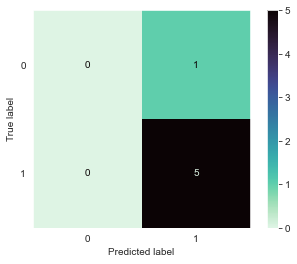

In [94]:
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)
score = cross_val_score(pipeline, X_cv, y, cv=5)

print(f"Accuracy Score : {round(accuracy_score(y_test, prediction) * 100, 2)}%")
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))
print(classification_report(y_test, prediction, labels=np.unique(prediction)))
plot_confusion_matrix(pipeline, X_test, y_test, cmap=cmap)
plt.grid(False)
plt.show()

Accuracy Score : 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



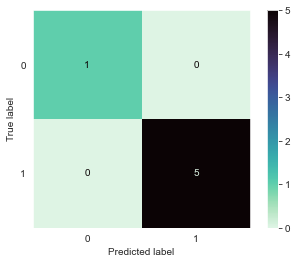

In [95]:
prediction = pipeline.predict(X_val)

print(f"Accuracy Score : {round(accuracy_score(y_val, prediction) * 100, 2)}%")

print(classification_report(y_val, prediction))

plot_confusion_matrix(pipeline, X_val, y_val, cmap=cmap)
plt.grid(False)
plt.show()